<a href="https://colab.research.google.com/github/4dh/learn-co-sandbox/blob/master/dmh_boston1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Python Packages Import

In [ ]:
#bees? 
#initial statements for numpy and pandas packages
import math
import numpy as np
import pandas as pd
import csv
import seaborn as sns
import scipy as sp
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
import matplotlib as mpl 
from mpl_toolkits.mplot3d import Axes3D 
import statsmodels.graphics.api as smg
import random
from sklearn.utils import shuffle

# Reading in Data File

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving marathon_results_2017_best.csv to marathon_results_2017_best.csv


In [ ]:
#boston_data = pd.read_csv(r'C:\\Users\\dheym\\OneDrive\\Documents\\WilliamMary19-20\\LinearRegression\\marathon_results_2017.csv\\marathon_results_2017.csv')
boston_data= pd.read_csv('marathon_results_2017_best.csv')
#boston_data.head(100)

In [ ]:
#Creation of dataframe only incorporating the variables that I am using in my model
boston_data_s = boston_data.loc[:,['Bib','M/F', 'Age', 'X2, 5K Pace', 'X3, Half Pace', 'Y, Official Time']]
#1 for Female and 0 for Male
boston_data_s['X4, Gender'] = np.where(boston_data_s['M/F']=='F', 1, 0)
# don't need this- if female X4 = 0, then it is a male
#boston_data_s['X5, Male'] = np.where(boston_data_s['M/F']=='M', 1, 0)
boston_data_s['X5, Wave: Elite'] = np.where(boston_data_s['Bib']<=100, 1, 0) 
boston_data_s['X6, Wave: One'] = np.where(((boston_data_s['Bib']<=7700) & (boston_data_s['Bib']>=100)) == True, 1, 0)
boston_data_s['X7, Wave: Two'] = np.where(((boston_data_s['Bib']<=15600) & (boston_data_s['Bib'] >= 8000)) == True, 1, 0)
boston_data_s['X8, Wave: Three'] = np.where(((boston_data_s['Bib']<=23600) & (boston_data_s['Bib'] >= 16000)) == True, 1, 0)
# don't need this - case when all other indicator variables = 0
#boston_data_s['X10, Wave: Four'] = np.where(((boston_data_s['Bib']<=32500) & (boston_data_s['Bib'] >= 24000)) == True, 1, 0)

#cleaning data types

#Note: Now, 'Bib' and 'M/F' are not needed as waves take on indicator variables and gender also takes on indicator variable
boston_data_s.rename(columns={'Age': 'X1, Age'}, inplace=True)

#boston_data_s.sample(10)


# Data Cleaning and Sample Selection

In [ ]:
#Splitting Data into training and test data before creation of model
#set seed in random_state argument so that we consistently choose to start at this seed every time 
#this code is run so that that training data for model building will be consistent

#get subsets of females, males; shuffle; split into two; bind set F1 and M1 as training and F2 and M2 as validation
boston_F = boston_data_s[boston_data_s['X4, Gender']== 1]
boston_Fs = shuffle(boston_F, random_state = 3)

#There are 11972 females, so split into 2 groups of 5986
boston_Fa = boston_Fs.iloc[0:5986,: ]
boston_Fb = boston_Fs.iloc[5986:11972,: ]

boston_M = boston_data_s[boston_data_s['X4, Gender']== 0]
boston_Ms = shuffle(boston_M, random_state = 4)

#There are 14438 males, so split into 2 groups of 7219
boston_Ma = boston_Ms.iloc[0:7219,: ]
boston_Mb = boston_Ms.iloc[7219:14438,: ]

#Now we merge females "a" and males "a" for dataset "a" (for training) and merge
#females "b" and males "b" for dataset "b" (validation)
boston_data_A = pd.concat([boston_Fa, boston_Ma])
boston_data_B = pd.concat([boston_Fb, boston_Mb])
#Now sort the two datasets by Y, official time
boston_data_A = boston_data_A.sort_values(by=['Y, Official Time'])
boston_data_A.dropna
boston_data_B = boston_data_B.sort_values(by=['Y, Official Time'])
boston_data_B.dropna
#boston_data_B.head(20)

<bound method DataFrame.dropna of          Bib M/F  X1, Age  ... X6, Wave: One X7, Wave: Two  X8, Wave: Three
1         17   M       30  ...             0             0                0
5         15   M       40  ...             0             0                0
6         63   M       33  ...             0             0                0
12        14   M       41  ...             0             0                0
13        16   M       34  ...             0             0                0
...      ...  ..      ...  ...           ...           ...              ...
26401  15547   M       68  ...             0             1                0
26403  31283   M       25  ...             0             0                0
26405  25166   F       61  ...             0             0                0
26406  25178   M       25  ...             0             0                0
26407  27086   F       57  ...             0             0                0

[13205 rows x 11 columns]>

In [ ]:
#Splitting Data into training and test data before creation of model
#set seed to 30 in random_state argument so that we consistently choose to start at this seed every time 
#this code is run so that that training data for model building will be consistent

#boston_data_A.drop('Bib', axis = 1)
col_set = ['X1, Age', 'X2, 5K Pace', 'X3, Half Pace', 'X4, Gender', 'X5, Wave: Elite', 'X6, Wave: One', 'X7, Wave: Two', 'X8, Wave: Three']
for i in range(len(col_set)):
  indexNames = 0
  indexNames = boston_data_A[boston_data_A[col_set[i]] == '#VALUE!' ].index
  if len(indexNames>0):
    # Delete these row indexes from dataFrame  
    boston_data_A.drop(indexNames , inplace=True)

#Do for B as well
for i in range(len(col_set)):
  indexNames = 0
  indexNames = boston_data_B[boston_data_B[col_set[i]] == '#VALUE!' ].index
  if len(indexNames>0):
    # Delete these row indexes from dataFrame  
    boston_data_B.drop(indexNames , inplace=True)

#more data cleaning 
boston_data_A['X2, 5K Pace'] = pd.to_numeric(boston_data_A['X2, 5K Pace'])
boston_data_A['X3, Half Pace'] = pd.to_numeric(boston_data_A['X3, Half Pace'])
boston_data_A['Index'] = list(range(len(boston_data_A)))

boston_data_B['X2, 5K Pace'] = pd.to_numeric(boston_data_B['X2, 5K Pace'])
boston_data_B['X3, Half Pace'] = pd.to_numeric(boston_data_B['X3, Half Pace'])
boston_data_B['Index'] = list(range(len(boston_data_B)))



/usr/local/lib/python3.6/dist-packages/pandas/core/ops/__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


In [ ]:
#Export to CSV
boston_data_A.to_csv('boston_data_A.csv')
files.download('boston_data_A.csv')

boston_data_B.to_csv('boston_data_B.csv')
files.download('boston_data_B.csv')

# Data Statistical Summary: Normality of Residuals

In [ ]:
#@title OLS Regression Model starting point{ form-width: "120px" }
#OLS regression
X = boston_data_A[['X1, Age', 'X2, 5K Pace', 'X3, Half Pace', 'X4, Gender', 'X5, Wave: Elite', 'X6, Wave: One', 'X7, Wave: Two', 'X8, Wave: Three']] 
y = boston_data_A['Y, Official Time']
## fit a OLS 
X = sm.add_constant(X)
boston_fit_A = sm.OLS(y, X.astype(float)).fit()

# fitted values (need a constant term for intercept)
boston_fit_A_y = boston_fit_A.fittedvalues
boston_data_A['Yfit'] = boston_fit_A_y

# residuals
boston_fit_A_residuals = boston_fit_A.resid
boston_data_A['Res'] = boston_fit_A_residuals

boston_fit_A.summary()


/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Y, Official Time   R-squared:                       0.907
Model:                            OLS   Adj. R-squared:                  0.907
Method:                 Least Squares   F-statistic:                 1.615e+04
Date:                Thu, 12 Dec 2019   Prob (F-statistic):               0.00
Time:                        20:04:04   Log-Likelihood:                -52424.
No. Observations:               13183   AIC:                         1.049e+05
Df Residuals:                   13174   BIC:                         1.049e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              23.7932      1.609     14.787      0.000      20.639      26.947
X1, Age            -0.0511      0.012     -4.257      0.000      -0.075      -0.028
X2, 5K Pace       -17.8734      0.510    -35.029      0.000     -18.874     -16.873
X3, Half Pace      60.1848      0.434    138.758      0.000      59.335      61.035
X4, Gender         -7.0166      0.297    -23.640      0.000      -7.598      -6.435
X5, Wave: Elite   -13.7280      2.147     -6.395      0.000     -17.936      -9.520
X6, Wave: One      -9.0043      0.574    -15.696      0.000     -10.129      -7.880
X7, Wave: Two      -5.4202      0.454    -11.952      0.000      -6.309      -4.531
X8, Wave: Three    -2.5755      0.409     -6.298      0.000      -3.377      -1.774
==============================================================================
Omnibus:                     6383.341   Durbin-Watson:                   1.758
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           109854.082
Skew:                           1.904   Prob(JB):                         0.00
Kurtosis:                      16.619   Cond. No.                         915.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Text(0, 0.5, 'Residuals')

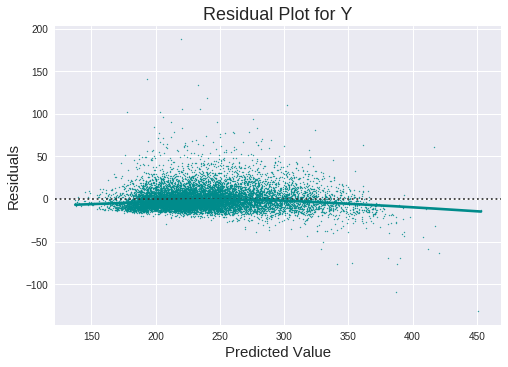

In [ ]:
#@title Residual Plots{ form-width: "120px" }
#residual plot for Y
plt.style.use('seaborn') 
plt.rc('font', size=14)
plt.rc('figure', titlesize=18)
plt.rc('axes', labelsize=15)
plt.rc('axes', titlesize=18)
resplot = sns.residplot(boston_data_A['Yfit'], boston_data_A['Res'], lowess=True, color="darkcyan", scatter_kws={'s':2})
resplot.axes.set_title('Residual Plot for Y')
resplot.axes.set_xlabel('Predicted Value')
resplot.axes.set_ylabel('Residuals')

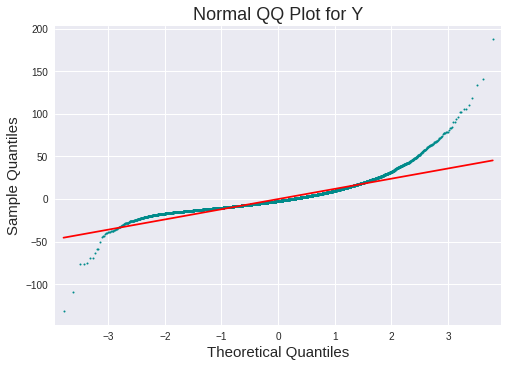

In [ ]:
#Normal QQ plot for Y
plt.style.use('seaborn') 
plt.rc('font', size=14)
plt.rc('figure', titlesize=18)
plt.rc('axes', labelsize=15)
plt.rc('axes', titlesize=18)
plt.rc('lines', markersize = 2)
qqplot = sm.qqplot(boston_data_A['Res'], line = 'r',color="darkcyan" )
plt.title('Normal QQ Plot for Y')
plt.show()
#Plot is symmetric with heavy tails

In [ ]:
#OLS regression for Y' = lnY
X = boston_data_A[['X1, Age', 'X2, 5K Pace', 'X3, Half Pace', 'X4, Gender', 'X5, Wave: Elite', 'X6, Wave: One', 'X7, Wave: Two', 'X8, Wave: Three']] 
#new colun for Y' = ln
boston_data_A['lnY, Official Time']= np.log(boston_data_A['Y, Official Time'])
y = boston_data_A['lnY, Official Time']
## fit a OLS 
X = sm.add_constant(X)
boston_fit_B_lnY = sm.OLS(y, X.astype(float)).fit()

# fitted values (need a constant term for intercept)
boston_fit_B_lnY_fit = boston_fit_B_lnY.fittedvalues
boston_data_A['lnYfit'] = boston_fit_B_lnY_fit

# residuals
boston_fit_B_lnY_residuals = boston_fit_B_lnY.resid
boston_data_A['Res, lnY'] = boston_fit_B_lnY_residuals

boston_fit_B_lnY.summary()

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     lnY, Official Time   R-squared:                       0.896
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                 1.420e+04
Date:                Thu, 12 Dec 2019   Prob (F-statistic):               0.00
Time:                        20:21:42   Log-Likelihood:                 19301.
No. Observations:               13183   AIC:                        -3.858e+04
Df Residuals:                   13174   BIC:                        -3.852e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               4.6134      0.007    661.197      0.000       4.600       4.627
X1, Age         -3.796e-05    5.2e-05     -0.730      0.466      -0.000     6.4e-05
X2, 5K Pace        -0.0616      0.002    -27.838      0.000      -0.066      -0.057
X3, Half Pace       0.2275      0.002    120.962      0.000       0.224       0.231
X4, Gender         -0.0257      0.001    -19.995      0.000      -0.028      -0.023
X5, Wave: Elite    -0.1578      0.009    -16.950      0.000      -0.176      -0.140
X6, Wave: One      -0.0556      0.002    -22.365      0.000      -0.061      -0.051
X7, Wave: Two      -0.0198      0.002    -10.074      0.000      -0.024      -0.016
X8, Wave: Three    -0.0022      0.002     -1.254      0.210      -0.006       0.001
==============================================================================
Omnibus:                     4164.583   Durbin-Watson:                   1.614
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            32339.126
Skew:                           1.303   Prob(JB):                         0.00
Kurtosis:                      10.217   Cond. No.                         915.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Text(0, 0.5, 'Residuals')

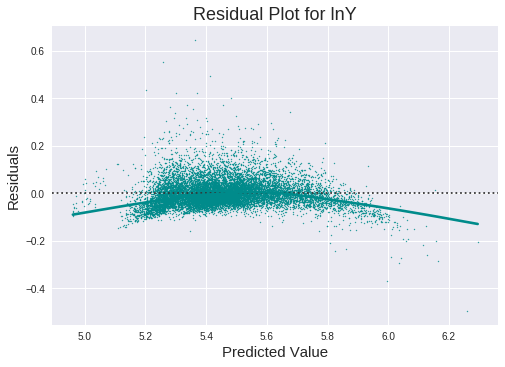

In [ ]:
#residual plot for lnY

plt.style.use('seaborn') 
plt.rc('font', size=14)
plt.rc('figure', titlesize=18)
plt.rc('axes', labelsize=15)
plt.rc('axes', titlesize=18)
resplot = sns.residplot(boston_data_A['lnYfit'], boston_data_A['Res, lnY'], lowess=True, color="darkcyan", scatter_kws={'s':2})
resplot.axes.set_title('Residual Plot for lnY')
resplot.axes.set_xlabel('Predicted Value')
resplot.axes.set_ylabel('Residuals')

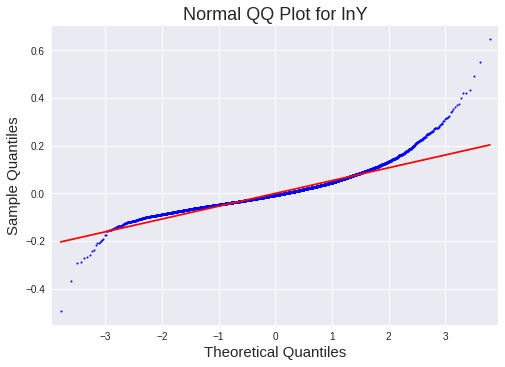

In [ ]:
#Normal QQ plot for lnY
plt.style.use('seaborn') 
plt.rc('font', size=14)
plt.rc('figure', titlesize=18)
plt.rc('axes', labelsize=15)
plt.rc('axes', titlesize=18)
plt.rc('lines', markersize = 2)

qqplot2 = sm.qqplot(boston_data_A['Res, lnY'], line = 'r')
plt.title('Normal QQ Plot for lnY')
plt.show()

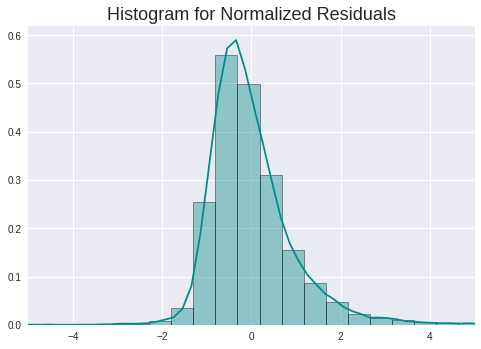

In [ ]:
#Standardized Residuals For Y Histogram
plt.style.use('seaborn') 
plt.rc('font', size=14)
plt.rc('figure', titlesize=18)
plt.rc('axes', labelsize=15)
plt.rc('axes', titlesize=18)
stdresidY = boston_fit_A.resid_pearson
sns.distplot(stdresidY, bins = 50, color = "darkcyan", hist_kws=dict(edgecolor="k", linewidth=1))
plt.rcParams["patch.force_edgecolor"] = True
plt.xlim([-5,5])
#plt.autoscale(enable=True, axis='y')
plt.title('Histogram for Normalized Residuals')
plt.show()
#The Histogram of Normalized Residuals reveals a normal distribution. This was using Y prior to the lnY transformation. For the model, I will 
#stick with using Y rather than lnY as there have not been improvements with residual normality after a lnY transformation.

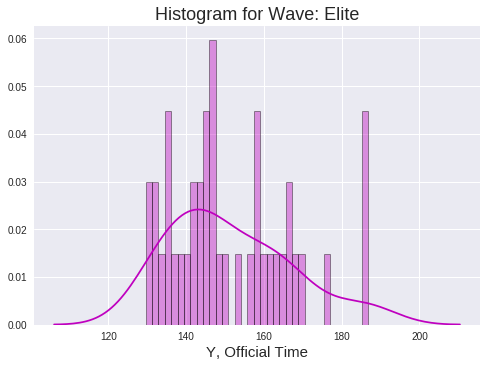

In [ ]:
#Histogram for elite wave
plt.style.use('seaborn') 
plt.rc('font', size=14)
plt.rc('figure', titlesize=18)
plt.rc('axes', labelsize=15)
plt.rc('axes', titlesize=18)
wave_e = boston_data_A[boston_data_A['X5, Wave: Elite']== 1]
wave_e_B = boston_data_B[boston_data_B['X5, Wave: Elite']== 1]
sns.distplot(wave_e["Y, Official Time"], bins = 35, color = "m", hist_kws=dict(edgecolor="k", linewidth=1))
plt.rcParams["patch.force_edgecolor"] = True
#plt.xlim([-5,5])
#plt.autoscale(enable=True, axis='y')
plt.title('Histogram for Wave: Elite')
plt.show()

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


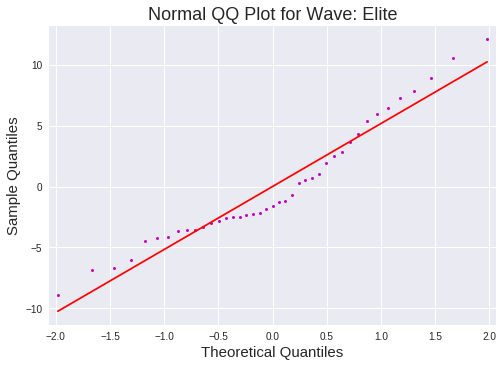

In [ ]:
#OLS regression for ELITE
X = wave_e[['X1, Age', 'X2, 5K Pace', 'X3, Half Pace', 'X4, Gender']] 

## fit a OLS 
X = sm.add_constant(X)
y = wave_e['Y, Official Time']
elite_OLS = sm.OLS(y, X.astype(float)).fit()

# fitted values (need a constant term for intercept)
elite_OLS_fit = elite_OLS.fittedvalues
wave_e['elite_fit'] = elite_OLS_fit

# residuals
elite_OLS_res = elite_OLS.resid
wave_e['Res, elite_OLS'] = elite_OLS_res

elite_OLS.summary()
#Normal QQ plot for Elite Wave
plt.style.use('seaborn') 
plt.rc('font', size=14)
plt.rc('figure', titlesize=18)
plt.rc('axes', labelsize=15)
plt.rc('axes', titlesize=18)
plt.rc('lines', markersize = 3)
qqplot2 = sm.qqplot(wave_e['Res, elite_OLS'], line = "r", color = "m")
plt.title('Normal QQ Plot for Wave: Elite')
plt.show()

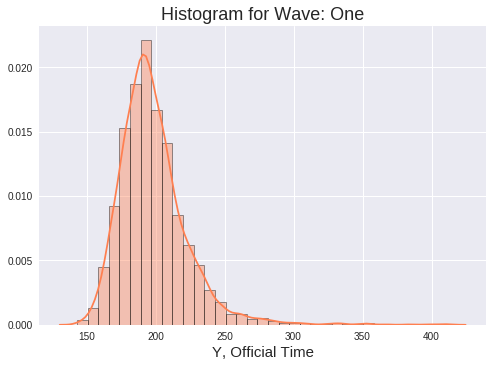

In [ ]:
#Histogram for wave 1
plt.style.use('seaborn') 
plt.rc('font', size=14)
plt.rc('figure', titlesize=18)
plt.rc('axes', labelsize=15)
plt.rc('axes', titlesize=18)
wave_1 = boston_data_A[boston_data_A['X6, Wave: One']== 1]
wave_1_B = boston_data_B[boston_data_B['X6, Wave: One']== 1]
sns.distplot(wave_1["Y, Official Time"], bins = 35, color = "coral", hist_kws=dict(edgecolor="k", linewidth=1))
plt.rcParams["patch.force_edgecolor"] = True
#plt.xlim([-5,5])
#plt.autoscale(enable=True, axis='y')
plt.title('Histogram for Wave: One')
plt.show()

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


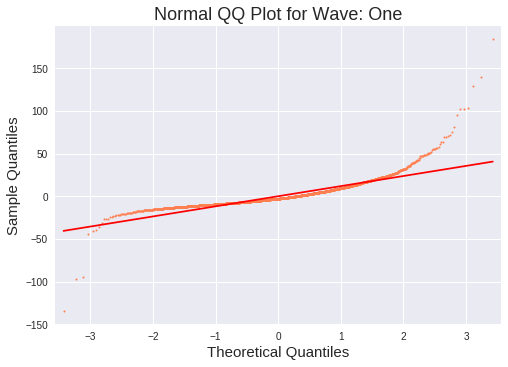

In [ ]:
#OLS regression for wave 1
X = wave_1[['X1, Age', 'X2, 5K Pace', 'X3, Half Pace', 'X4, Gender']] 
y = wave_1['Y, Official Time']
## fit a OLS 
X = sm.add_constant(X)
w1_OLS = sm.OLS(y, X.astype(float)).fit()

# fitted values (need a constant term for intercept)
w1_OLS_fit = w1_OLS.fittedvalues
wave_1['w1_fit'] = w1_OLS_fit

# residuals
w1_OLS_res = w1_OLS.resid
wave_1['Res, w1_OLS'] = w1_OLS_res

w1_OLS.summary()
#Normal QQ plot for Wave One
plt.style.use('seaborn') 
plt.rc('font', size=14)
plt.rc('figure', titlesize=18)
plt.rc('axes', labelsize=15)
plt.rc('axes', titlesize=18)
plt.rc('lines', markersize = 2)
qqplot2 = sm.qqplot(wave_1['Res, w1_OLS'], line = "r", color = "coral")
plt.title('Normal QQ Plot for Wave: One')
plt.show()

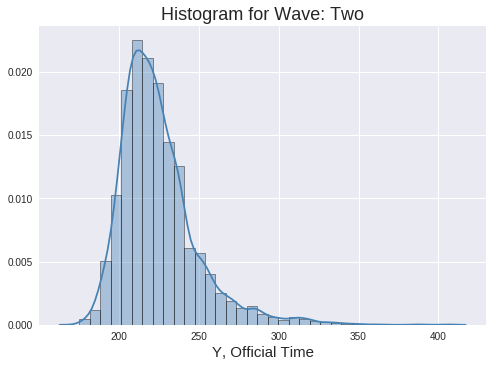

In [ ]:
#Histogram for wave 2
plt.style.use('seaborn') 
plt.rc('font', size=14)
plt.rc('figure', titlesize=18)
plt.rc('axes', labelsize=15)
plt.rc('axes', titlesize=18)
wave_2 = boston_data_A[boston_data_A['X7, Wave: Two']== 1]
wave_2_B = boston_data_B[boston_data_B['X7, Wave: Two']== 1]
sns.distplot(wave_2["Y, Official Time"], bins = 35, color = "steelblue", hist_kws=dict(edgecolor="k", linewidth=1))
plt.rcParams["patch.force_edgecolor"] = True
#plt.xlim([-5,5])
#plt.autoscale(enable=True, axis='y')
plt.title('Histogram for Wave: Two')
plt.show()

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


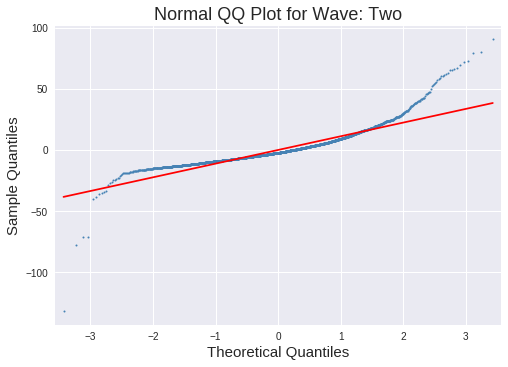

In [ ]:
#OLS regression for wave 2
X = wave_2[['X1, Age', 'X2, 5K Pace', 'X3, Half Pace', 'X4, Gender']] 
y = wave_2['Y, Official Time']
## fit a OLS 
X = sm.add_constant(X)
w2_OLS = sm.OLS(y, X.astype(float)).fit()

# fitted values (need a constant term for intercept)
w2_OLS_fit = w2_OLS.fittedvalues
wave_2['w2_fit'] = w2_OLS_fit

# residuals
w2_OLS_res = w2_OLS.resid
wave_2['Res, w2_OLS'] = w2_OLS_res

w2_OLS.summary()
#Normal QQ plot for Wave One
plt.style.use('seaborn') 
plt.rc('font', size=14)
plt.rc('figure', titlesize=18)
plt.rc('axes', labelsize=15)
plt.rc('axes', titlesize=18)
plt.rc('lines', markersize = 2)
qqplot2 = sm.qqplot(wave_2['Res, w2_OLS'], line = "r", color = "steelblue")
plt.title('Normal QQ Plot for Wave: Two')
plt.show()

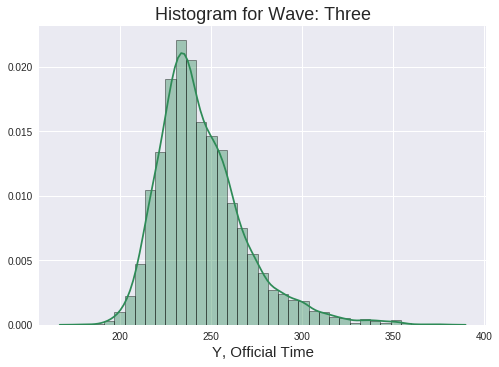

In [ ]:
#Histograms for wave 3
plt.style.use('seaborn') 
plt.rc('font', size=14)
plt.rc('figure', titlesize=18)
plt.rc('axes', labelsize=15)
plt.rc('axes', titlesize=18)
wave_3 = boston_data_A[boston_data_A['X8, Wave: Three']== 1]
wave_3_B = boston_data_B[boston_data_B['X8, Wave: Three']== 1]
sns.distplot(wave_3["Y, Official Time"], bins = 35, color = "seagreen", hist_kws=dict(edgecolor="k", linewidth=1))
plt.rcParams["patch.force_edgecolor"] = True
#plt.xlim([-5,5])
#plt.autoscale(enable=True, axis='y')
plt.title('Histogram for Wave: Three')
plt.show()

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


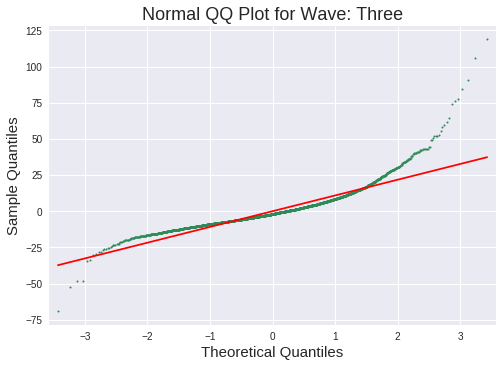

In [ ]:
#OLS regression for wave 3
X = wave_3[['X1, Age', 'X2, 5K Pace', 'X3, Half Pace', 'X4, Gender']] 
y = wave_3['Y, Official Time']
## fit a OLS 
X = sm.add_constant(X)
w3_OLS = sm.OLS(y, X.astype(float)).fit()

# fitted values (need a constant term for intercept)
w3_OLS_fit = w3_OLS.fittedvalues
wave_3['w3_fit'] = w3_OLS_fit

# residuals
w3_OLS_res = w3_OLS.resid
wave_3['Res, w3_OLS'] = w3_OLS_res

w3_OLS.summary()
#Normal QQ plot for Wave One
plt.style.use('seaborn') 
plt.rc('font', size=14)
plt.rc('figure', titlesize=18)
plt.rc('axes', labelsize=15)
plt.rc('axes', titlesize=18)
plt.rc('lines', markersize = 2)
qqplot2 = sm.qqplot(wave_3['Res, w3_OLS'], line = "r", color = "seagreen")
plt.title('Normal QQ Plot for Wave: Three')
plt.show()

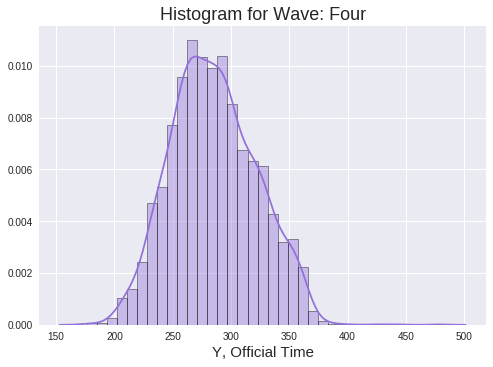

In [ ]:
#Histogram for wave 4
plt.style.use('seaborn') 
plt.rc('font', size=14)
plt.rc('figure', titlesize=18)
plt.rc('axes', labelsize=15)
plt.rc('axes', titlesize=18)
wave_4 = boston_data_A[(boston_data_A['X8, Wave: Three'] + boston_data_A['X7, Wave: Two'] + boston_data_A['X6, Wave: One'] + boston_data_A['X5, Wave: Elite']) == 0 ]
wave_4_B = boston_data_B[(boston_data_B['X8, Wave: Three'] + boston_data_B['X7, Wave: Two'] + boston_data_B['X6, Wave: One'] + boston_data_B['X5, Wave: Elite']) == 0 ]
sns.distplot(wave_4["Y, Official Time"], bins = 35, color = "mediumpurple", hist_kws=dict(edgecolor="k", linewidth=1))
plt.rcParams["patch.force_edgecolor"] = True
#plt.xlim([-5,5])
#plt.autoscale(enable=True, axis='y')
plt.title('Histogram for Wave: Four')
plt.show()

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


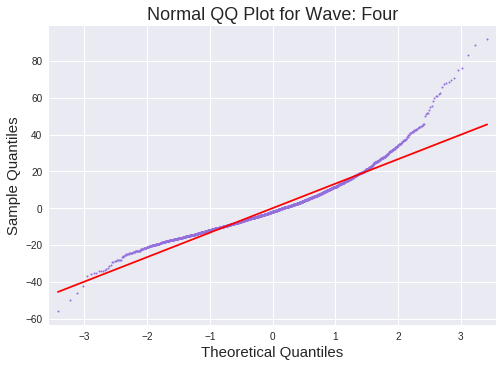

In [ ]:
#OLS regression for wave 4
X = wave_4[['X1, Age', 'X2, 5K Pace', 'X3, Half Pace', 'X4, Gender']] 
y = wave_4['Y, Official Time']
## fit a OLS 
X = sm.add_constant(X)
w4_OLS = sm.OLS(y, X.astype(float)).fit()

# fitted values (need a constant term for intercept)
w4_OLS_fit = w4_OLS.fittedvalues
wave_4['w4_fit'] = w4_OLS_fit

# residuals
w4_OLS_res = w4_OLS.resid
wave_4['Res, w4_OLS'] = w4_OLS_res

w4_OLS.summary()
#Normal QQ plot for Wave One
plt.style.use('seaborn') 
plt.rc('font', size=14)
plt.rc('figure', titlesize=18)
plt.rc('axes', labelsize=15)
plt.rc('axes', titlesize=18)
plt.rc('lines', markersize = 2)

qqplot2 = sm.qqplot(wave_4['Res, w4_OLS'], line = "r", color = "mediumpurple")
plt.title('Normal QQ Plot for Wave: Four')
plt.show()

# Preliminary Research


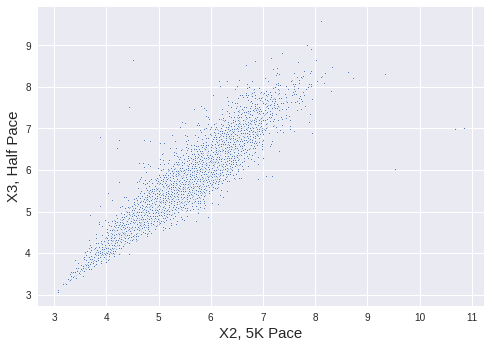

In [ ]:
# Understanding the data
#Scatter Plot of 5k pace vs half marathon pace
cmap = sns.cubehelix_palette(dark=.3, light=.8, as_cmap=True)

ax = sns.scatterplot(x = 'X2, 5K Pace', y = 'X3, Half Pace', sizes=(20, 200), palette=cmap, hue_norm=(0, 7), legend="full", data = boston_data_A)

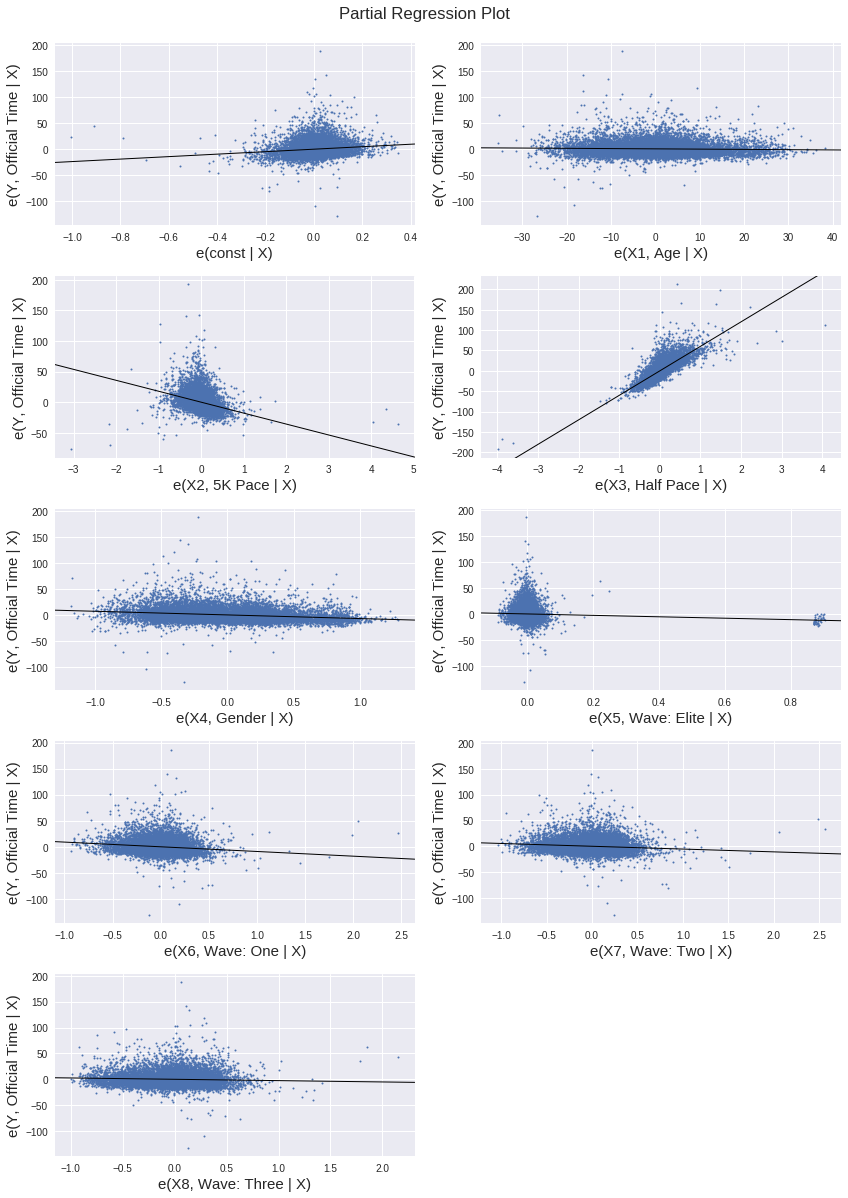

In [ ]:
#Partial Regression Plots
fig = plt.figure(figsize=(12,17))
plt.style.use('seaborn') 
plt.rc('font', size=14)
plt.rc('figure', titlesize=18)
plt.rc('axes', labelsize=15)
plt.rc('axes', titlesize=18)
plt.rc('lines', markersize = 2)
plt.rc('lines', linewidth = 1)
plt.rc('lines', color = 'forestgreen')
fig = sm.graphics.plot_partregress_grid( boston_fit_A, fig=fig)
#fig2 = boston_fit_A.plot_coefficients_of_determination(figsize=(8,2))

# Data Statistical Summary: Correlations, Matrix Plots, Scatter Plots

,"Y, Official Time","X1, Age","X2, 5K Pace","X3, Half Pace","X4, Gender","X5, Wave: Elite","X6, Wave: One","X7, Wave: Two","X8, Wave: Three"
"Y, Official Time",1.000000,0.227210,0.875601,0.945579,0.239609,-0.113838,-0.535999,-0.179481,0.096410
"X1, Age",0.227210,1.000000,0.204271,0.222481,-0.204270,-0.057078,-0.279213,0.027032,0.256546
"X2, 5K Pace",0.875601,0.204271,1.000000,0.953547,0.321853,-0.122000,-0.608814,-0.190943,0.123380
"X3, Half Pace",0.945579,0.222481,0.953547,1.000000,0.321262,-0.117178,-0.581353,-0.185030,0.119776
"X4, Gender",0.239609,-0.204270,0.321853,0.321262,1.000000,-0.015269,-0.440112,-0.001842,0.362502
"X5, Wave: Elite",-0.113838,-0.057078,-0.122000,-0.117178,-0.015269,1.000000,-0.032191,-0.032302,-0.032452
"X6, Wave: One",-0.535999,-0.279213,-0.608814,-0.581353,-0.440112,-0.032191,1.000000,-0.333299,-0.334847
"X7, Wave: Two",-0.179481,0.027032,-0.190943,-0.185030,-0.001842,-0.032302,-0.333299,1.000000,-0.336000
"X8, Wave: Three",0.096410,0.256546,0.123380,0.119776,0.362502,-0.032452,-0.334847,-0.336000,1.000000


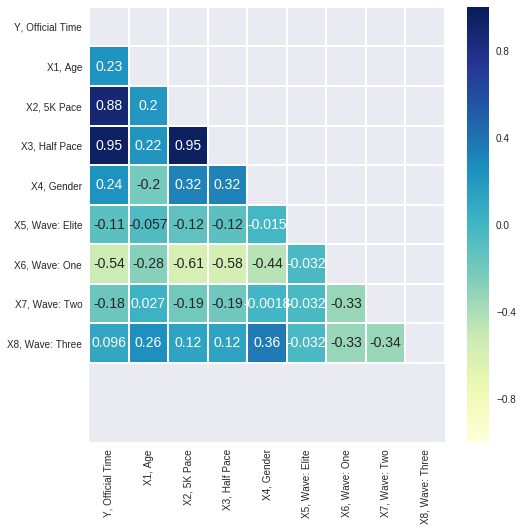

In [ ]:
#@title Correlation Matrix Heatmap{ form-width: "120px" }
boston_select_A = boston_data_A.loc[:,['Y, Official Time','X1, Age', 'X2, 5K Pace', 'X3, Half Pace', 'X4, Gender', 'X5, Wave: Elite', 'X6, Wave: One', 'X7, Wave: Two', 'X8, Wave: Three']]
corrMatrix = boston_select_A.corr()
display(corrMatrix)

mask = np.zeros_like(corrMatrix)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(8,8))


with sns.axes_style("white"):
  sns.heatmap(corrMatrix, mask=mask, square= True,  annot=True, cmap='YlGnBu',  vmin=-1, vmax=1, linewidths=1)
  ax.set_ylim(11, 0)


In [ ]:
#@title Pairwise { form-width: "120px" }
display(boston_select_A.describe(include='all'))
#d.summary(stats='basic', columns='all', orientation='auto')

,"Y, Official Time","X1, Age","X2, 5K Pace","X3, Half Pace","X4, Gender","X5, Wave: Elite","X6, Wave: One","X7, Wave: Two","X8, Wave: Three"
count,13183.000000,13183.000000,13183.000000,13183.000000,13183.000000,13183.000000,13183.000000,13183.000000,13183.000000
mean,237.890005,42.515133,5.109776,5.235105,0.453159,0.003110,0.249336,0.250626,0.252370
std,42.427865,11.364216,0.801240,0.870168,0.497820,0.055683,0.432645,0.433390,0.434389
min,129.620000,18.000000,3.080000,3.061030,0.000000,0.000000,0.000000,0.000000,0.000000
25%,207.800000,34.000000,4.530000,4.622350,0.000000,0.000000,0.000000,0.000000,0.000000
50%,231.430000,43.000000,5.010000,5.105820,0.000000,0.000000,0.000000,0.000000,0.000000
75%,261.780000,51.000000,5.556000,5.684090,1.000000,0.000000,0.000000,1.000000,1.000000
max,478.230000,80.000000,10.846000,9.598300,1.000000,1.000000,1.000000,1.000000,1.000000


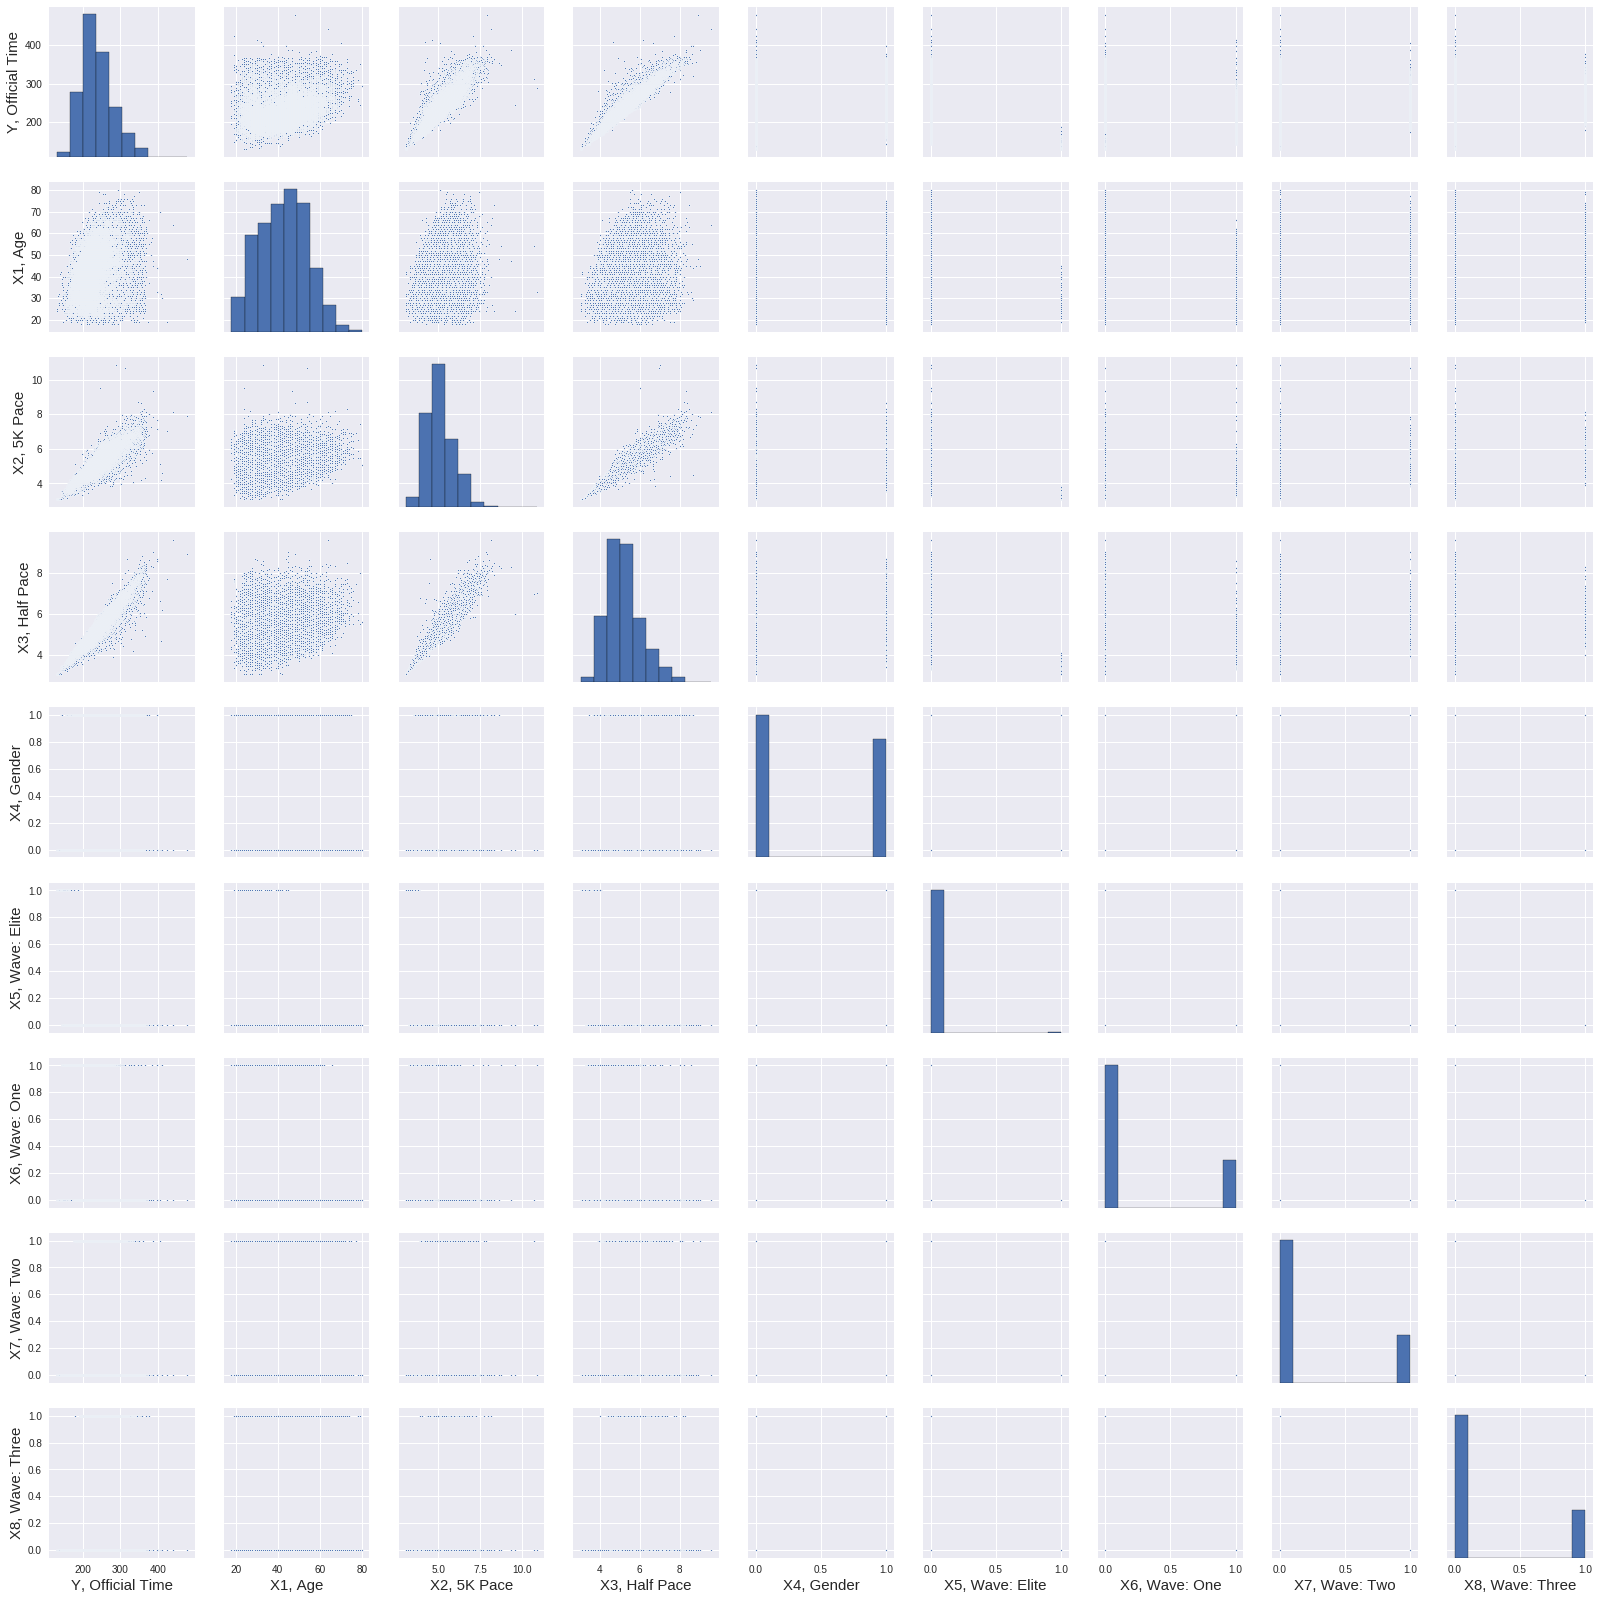

In [ ]:
#@title Pairwise scatter plots for checking multicollinearity{ form-width: "120px" }
sns.pairplot(boston_select_A, height = 2.5)


Text(0.5, 1, 'Impact of Gender on Pace')

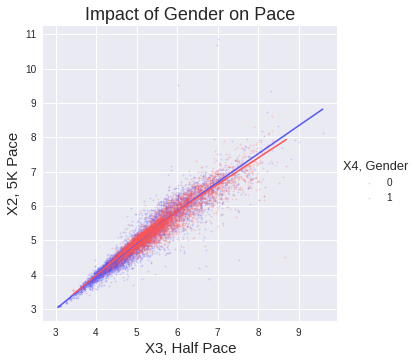

In [ ]:
#I'd like to investigate the negative coefficient for X4, Gender
sns.lmplot(y='X2, 5K Pace', x='X3, Half Pace',
           hue='X4, Gender', data=boston_select_A, lowess = True, palette = 'seismic', markers = "+", scatter_kws={'s':6, 'alpha':0.2}) 
#plt.rc("lines", )
plt.title('Impact of Gender on Pace')

# Remedial Measures

In [ ]:
from scipy import stats
#influence & outliers

#GENERAL MODEL
#make new empty dataframe of outliers
oddcases_g = pd.DataFrame()

#INFLUENCE OLS Influence results
b_influences = boston_fit_A.get_influence()

###ti externally studentized deleted residuals
b_ti = b_influences.resid_studentized_external
boston_data_A['ti']=b_ti
###t test for Bonferroni sumultaneous test procedure with a family significance level of alpha = .10
#t(1-(alpha/2n); n-p-1)
#cases greater denote outliers in Y; should be added to outlier list
t_bon = stats.t.ppf(1-(.10/(2*len(boston_data_A))), (len(boston_data_A)-9-1))
#4.478348339712635
print("t value for test for Bonferroni simultaneous test procedure with a family significance level of alpha = .10: ", t_bon)
bad_ti = boston_data_A[abs(boston_data_A['ti']) > t_bon]
#71 outliers; not bad for sample size

#### leverage, from statsmodels internals
b_leverage = b_influences.hat_matrix_diag
boston_data_A['hii'] = b_leverage
#leverage that is greater than 3p/n denotes extreme outliers in X (I changed criteria from 2p/n to 3p/n to avoid deleting too many data points)
hii_marker = 3*9/len(boston_data_A)
print("Hii cutoff point for declaring outliers in X: ", hii_marker)
bad_hii = boston_data_A[abs(boston_data_A['hii']) > hii_marker]
#463 cases (greater than 2*(p/n)) --> 155 cases with tighter criteria (greater than 3*(p/n))

#### DFFITS, from statsmodels internals
###NOTE, due to large number of DFFITS greater than 2*sqrt(p/n), I changed the criteria of highly influential for the model to 4*sqrt(p/n) to avoid 
#getting rid of too many data points
b_DFFITS = b_influences.dffits
boston_data_A['DFFITS'] = b_DFFITS[0]
#DFFITS greater than 4*sqrt(p/n) denotes very high influence; for a small n, DFFITS greater than 1 denotes high influence
DFFITS_marker = 4*math.sqrt(9/len(boston_data_A))
print("DFFITS cutoff point for declaring highly influential points: ", DFFITS_marker)
bad_DFFITS = boston_data_A[abs(boston_data_A['DFFITS']) > DFFITS_marker]
#607 cases (greater than 2*sqrt(p/n)) --> 127 cases with tighter criteria (greater than 4*sqrt(p/n))

# cook's distance, from statsmodels internals
b_cooks = b_influences.cooks_distance[0]
boston_data_A['Cooks distance'] = b_cooks
#Now we need the F statistic from F(p,n-p) distribution to see if the percentile is 50 percent or more. Find 50th percentile and see if DFFITS value exceeds
F50 = sp.stats.f.ppf(q=.5, dfn=9, dfd=(len(boston_data_A)-9))
print("F statistic from F(p,n-p) distribution at 50th percentile: ", F50)
bad_cooks = boston_data_A[abs(boston_data_A['Cooks distance']) > F50]
#0.9270286556620607
#No cases

#TABLE OF OUTLIERS AND INFLUENCERS
oddcases_g = pd.concat([bad_ti, bad_hii, bad_DFFITS, bad_cooks])
boston_data_A_g = boston_data_A[~boston_data_A['Bib'].isin(oddcases_g['Bib'])]
print("The number of outliers and influential points deleted from the data is: ", len(boston_data_A)-len(boston_data_A_g))



t value for test for Bonferroni sumultaneous test procedure with a family significance level of alpha = .10:  4.478348339712635
Hii cutoff point for declaring outliers in X:  0.0020480922400060685
DFFITS cutoff point for declaring highly influential points:  0.10451391588379845
F statistic from F(p,n-p) distribution at 50th percentile:  0.9270286556620607
The number of outliers and influential points deleted from the data is:  241


In [ ]:
#Export to CSV
boston_data_A_g = shuffle(boston_data_A_g, random_state = 3)
boston_data_A_g.to_csv('boston_data_A_g.csv')
files.download('boston_data_A_g.csv')

boston_data_B= shuffle(boston_data_B, random_state = 3)
boston_data_B.to_csv('boston_data_B.csv')
files.download('boston_data_B.csv')

In [ ]:
#WAVE Elite
#make new empty dataframe of outliers
oddcases_e = pd.DataFrame()

#INFLUENCE OLS Influence results
b_influences_e = elite_OLS.get_influence()

###ti externally studentized deleted residuals
b_ti_e = b_influences_e.resid_studentized_external
wave_e['ti']=b_ti_e
###t test for Bonferroni sumultaneous test procedure with a family significance level of alpha = .10
#t(1-(alpha/2n); n-p-1)
#cases greater denote outliers in Y; should be added to outlier list
t_bon_e = stats.t.ppf(1-(.10/(2*len(wave_e))), (len(wave_e)-9-1))
print("t value for test for Bonferroni simultaneous test procedure with a family significance level of alpha = .10: ", t_bon_e)
bad_ti_e = wave_e[abs(wave_e['ti']) > t_bon_e]


#### leverage, from statsmodels internals
b_leverage_e = b_influences_e.hat_matrix_diag
wave_e['hii'] = b_leverage_e
#leverage that is greater than 3p/n denotes extreme outliers in X (I changed criteria from 2p/n to 3p/n to avoid deleting too many data points)
hii_marker_e = 3*9/len(wave_e)
print("Hii cutoff point for declaring outliers in X: ", hii_marker_e)
bad_hii_e = wave_e[abs(wave_e['hii']) > hii_marker_e]


#### DFFITS, from statsmodels internals
###NOTE, due to large number of DFFITS greater than 2*sqrt(p/n), I changed the criteria of highly influential for the model to 4*sqrt(p/n) to avoid 
#getting rid of too many data points
b_DFFITS_e = b_influences_e.dffits
wave_e['DFFITS'] = b_DFFITS_e[0]
#DFFITS greater than 4*sqrt(p/n) denotes very high influence; for a small n, DFFITS greater than 1 denotes high influence
DFFITS_marker_e = 4*math.sqrt(9/len(wave_e))
print("DFFITS cutoff point for declaring highly influential points: ", DFFITS_marker_e)
bad_DFFITS_e = wave_e[abs(wave_e['DFFITS']) > DFFITS_marker_e]

# cook's distance, from statsmodels internals
b_cooks_e = b_influences_e.cooks_distance[0]
wave_e['Cooks distance'] = b_cooks_e
#Now we need the F statistic from F(p,n-p) distribution to see if the percentile is 50 percent or more. Find 50th percentile and see if DFFITS value exceeds
F50_e = sp.stats.f.ppf(q=.5, dfn=9, dfd=(len(wave_e)-9))
print("F statistic from F(p,n-p) distribution at 50th percentile: ", F50_e)
bad_cooks_e = wave_e[abs(wave_e['Cooks distance']) > F50_e]


#TABLE OF OUTLIERS AND INFLUENCERS
oddcases_e = pd.concat([bad_ti_e, bad_hii_e, bad_DFFITS_e, bad_cooks_e])
#wave_e_g is "good" data that is left
wave_e_g = wave_e[~wave_e['Bib'].isin(oddcases_e['Bib'])]
print("The number of outliers and influential points deleted from the data is: ", len(wave_e)-len(wave_e_g))

t value for test for Bonferroni sumultaneous test procedure with a family significance level of alpha = .10:  3.299677798044307
Hii cutoff point for declaring outliers in X:  0.6585365853658537
DFFITS cutoff point for declaring highly influential points:  1.8740851426632728
F statistic from F(p,n-p) distribution at 50th percentile:  0.9467110802014125
The number of outliers and influential points deleted from the data is:  0


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stabl

In [ ]:
#WAVE One
#make new empty dataframe of outliers
oddcases_1 = pd.DataFrame()

#INFLUENCE OLS Influence results
b_influences_1 = w1_OLS.get_influence()
###ti externally studentized deleted residuals
b_ti_1 = b_influences_1.resid_studentized_external
wave_1['ti']=b_ti_1
###t test for Bonferroni sumultaneous test procedure with a family significance level of alpha = .10
#t(1-(alpha/2n); n-p-1)
#cases greater denote outliers in Y; should be added to outlier list
t_bon_1 = stats.t.ppf(1-(.10/(2*len(wave_1))), (len(wave_1)-9-1))
print("t value for test for Bonferroni sumultaneous test procedure with a family significance level of alpha = .10: ", t_bon_1)
bad_ti_1 = wave_1[abs(wave_1['ti']) > t_bon_1]


#### leverage, from statsmodels internals
b_leverage_1 = b_influences_1.hat_matrix_diag
wave_1['hii'] = b_leverage_1
#leverage that is greater than 3p/n denotes extreme outliers in X (I changed criteria from 2p/n to 3p/n to avoid deleting too many data points)
hii_marker_1 = 3*9/len(wave_1)
print("Hii cutoff point for declaring outliers in X: ", hii_marker_1)
bad_hii_1 = wave_1[abs(wave_1['hii']) > hii_marker_1]


#### DFFITS, from statsmodels internals
###NOTE, due to large number of DFFITS greater than 2*sqrt(p/n), I changed the criteria of highly influential for the model to 4*sqrt(p/n) to avoid 
#getting rid of too many data points
b_DFFITS_1 = b_influences_1.dffits
wave_1['DFFITS'] = b_DFFITS_1[0]
#DFFITS greater than 4*sqrt(p/n) denotes very high influence; for a small n, DFFITS greater than 1 denotes high influence
DFFITS_marker_1 = 4*math.sqrt(9/len(wave_1))
print("DFFITS cutoff point for declaring highly influential points: ", DFFITS_marker_1)
bad_DFFITS_1 = wave_1[abs(wave_1['DFFITS']) > DFFITS_marker_1]

# cook's distance, from statsmodels internals
b_cooks_1 = b_influences_1.cooks_distance[0]
wave_1['Cooks distance'] = b_cooks_1
#Now we need the F statistic from F(p,n-p) distribution to see if the percentile is 50 percent or more. Find 50th percentile and see if DFFITS value exceeds
F50_1 = sp.stats.f.ppf(q=.5, dfn=9, dfd=(len(wave_1)-9))
print("F statistic from F(p,n-p) distribution at 50th percentile: ", F50_1)
bad_cooks_1 = wave_1[abs(wave_1['Cooks distance']) > F50_1]


#TABLE OF OUTLIERS AND INFLUENCERS
oddcases_1 = pd.concat([bad_ti_1, bad_hii_1, bad_DFFITS_1, bad_cooks_1])
#wave_e_g is "good" data that is left
wave_1_g = wave_1[~wave_1['Bib'].isin(oddcases_1['Bib'])]
print("The number of outliers and influential points deleted from the data is: ", len(wave_1)-len(wave_1_g))

t value for test for Bonferroni sumultaneous test procedure with a family significance level of alpha = .10:  4.17613601486594
Hii cutoff point for declaring outliers in X:  0.008214177061149984
DFFITS cutoff point for declaring highly influential points:  0.20930586309545476
F statistic from F(p,n-p) distribution at 50th percentile:  0.9271713044432743
The number of outliers and influential points deleted from the data is:  53


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-

In [ ]:
#WAVE Two
#make new empty dataframe of outliers
oddcases_2 = pd.DataFrame()

#INFLUENCE OLS Influence results
b_influences_2 = w2_OLS.get_influence()
###ti externally studentized deleted residuals
b_ti_2 = b_influences_2.resid_studentized_external
wave_2['ti']=b_ti_2
###t test for Bonferroni sumultaneous test procedure with a family significance level of alpha = .10
#t(1-(alpha/2n); n-p-1)
#cases greater denote outliers in Y; should be added to outlier list
t_bon_2 = stats.t.ppf(1-(.10/(2*len(wave_2))), (len(wave_2)-9-1))
print("t value for test for Bonferroni sumultaneous test procedure with a family significance level of alpha = .10: ", t_bon_2)
bad_ti_2 = wave_2[abs(wave_2['ti']) > t_bon_2]


#### leverage, from statsmodels internals
b_leverage_2 = b_influences_2.hat_matrix_diag
wave_2['hii'] = b_leverage_2
#leverage that is greater than 3p/n denotes extreme outliers in X (I changed criteria from 2p/n to 3p/n to avoid deleting too many data points)
hii_marker_2 = 3*9/len(wave_2)
print("Hii cutoff point for declaring outliers in X: ", hii_marker_2)
bad_hii_2 = wave_2[abs(wave_2['hii']) > hii_marker_2]


#### DFFITS, from statsmodels internals
###NOTE, due to large number of DFFITS greater than 2*sqrt(p/n), I changed the criteria of highly influential for the model to 4*sqrt(p/n) to avoid 
#getting rid of too many data points
b_DFFITS_2 = b_influences_2.dffits
wave_2['DFFITS'] = b_DFFITS_2[0]
#DFFITS greater than 4*sqrt(p/n) denotes very high influence; for a small n, DFFITS greater than 1 denotes high influence
DFFITS_marker_2 = 4*math.sqrt(9/len(wave_2))
print("DFFITS cutoff point for declaring highly influential points: ", DFFITS_marker_2)
bad_DFFITS_2 = wave_2[abs(wave_2['DFFITS']) > DFFITS_marker_2]

# cook's distance, from statsmodels internals
b_cooks_2 = b_influences_2.cooks_distance[0]
wave_2['Cooks distance'] = b_cooks_2
#Now we need the F statistic from F(p,n-p) distribution to see if the percentile is 50 percent or more. Find 50th percentile and see if DFFITS value exceeds
F50_2 = sp.stats.f.ppf(q=.5, dfn=9, dfd=(len(wave_2)-9))
print("F statistic from F(p,n-p) distribution at 50th percentile: ", F50_2)
bad_cooks_2 = wave_2[abs(wave_2['Cooks distance']) > F50_2]


#TABLE OF OUTLIERS AND INFLUENCERS
oddcases_2 = pd.concat([bad_ti_2, bad_hii_2, bad_DFFITS_2, bad_cooks_2])
#wave_e_g is "good" data that is left
wave_2_g = wave_2[~wave_2['Bib'].isin(oddcases_2['Bib'])]
print("The number of outliers and influential points deleted from the data is: ", len(wave_2)-len(wave_2_g))

t value for test for Bonferroni sumultaneous test procedure with a family significance level of alpha = .10:  4.177285902697084
Hii cutoff point for declaring outliers in X:  0.008171912832929782
DFFITS cutoff point for declaring highly influential points:  0.2087667001917663
F statistic from F(p,n-p) distribution at 50th percentile:  0.9271703245863058
The number of outliers and influential points deleted from the data is:  66


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-

In [ ]:
#WAVE Three
#make new empty dataframe of outliers
oddcases_3 = pd.DataFrame()

#INFLUENCE OLS Influence results
b_influences_3 = w3_OLS.get_influence()
###ti externally studentized deleted residuals
b_ti_3 = b_influences_3.resid_studentized_external
wave_3['ti']=b_ti_3
###t test for Bonferroni sumultaneous test procedure with a family significance level of alpha = .10
#t(1-(alpha/2n); n-p-1)
#cases greater denote outliers in Y; should be added to outlier list
t_bon_3 = stats.t.ppf(1-(.10/(2*len(wave_3))), (len(wave_3)-9-1))
print("t value for test for Bonferroni sumultaneous test procedure with a family significance level of alpha = .10: ", t_bon_3)
bad_ti_3 = wave_3[abs(wave_3['ti']) > t_bon_3]


#### leverage, from statsmodels internals
b_leverage_3 = b_influences_3.hat_matrix_diag
wave_3['hii'] = b_leverage_3
#leverage that is greater than 3p/n denotes extreme outliers in X (I changed criteria from 2p/n to 3p/n to avoid deleting too many data points)
hii_marker_3 = 3*9/len(wave_3)
print("Hii cutoff point for declaring outliers in X: ", hii_marker_3)
bad_hii_3 = wave_3[abs(wave_3['hii']) > hii_marker_3]


#### DFFITS, from statsmodels internals
###NOTE, due to large number of DFFITS greater than 2*sqrt(p/n), I changed the criteria of highly influential for the model to 4*sqrt(p/n) to avoid 
#getting rid of too many data points
b_DFFITS_3 = b_influences_3.dffits
wave_3['DFFITS'] = b_DFFITS_3[0]
#DFFITS greater than 4*sqrt(p/n) denotes very high influence; for a small n, DFFITS greater than 1 denotes high influence
DFFITS_marker_3 = 4*math.sqrt(9/len(wave_3))
print("DFFITS cutoff point for declaring highly influential points: ", DFFITS_marker_3)
bad_DFFITS_3 = wave_3[abs(wave_3['DFFITS']) > DFFITS_marker_3]

# cook's distance, from statsmodels internals
b_cooks_3 = b_influences_3.cooks_distance[0]
wave_3['Cooks distance'] = b_cooks_3
#Now we need the F statistic from F(p,n-p) distribution to see if the percentile is 50 percent or more. Find 50th percentile and see if DFFITS value exceeds
F50_3 = sp.stats.f.ppf(q=.5, dfn=9, dfd=(len(wave_3)-9))
print("F statistic from F(p,n-p) distribution at 50th percentile: ", F50_3)
bad_cooks_3 = wave_3[abs(wave_3['Cooks distance']) > F50_3]


#TABLE OF OUTLIERS AND INFLUENCERS
oddcases_3 = pd.concat([bad_ti_3, bad_hii_3, bad_DFFITS_3, bad_cooks_3])
#wave_e_g is "good" data that is left
wave_3_g = wave_3[~wave_3['Bib'].isin(oddcases_3['Bib'])]
print("The number of outliers and influential points deleted from the data is: ", len(wave_3)-len(wave_3_g))

t value for test for Bonferroni sumultaneous test procedure with a family significance level of alpha = .10:  4.178831949367677
Hii cutoff point for declaring outliers in X:  0.008115419296663661
DFFITS cutoff point for declaring highly influential points:  0.20804383251822886
F statistic from F(p,n-p) distribution at 50th percentile:  0.9271690148809925
The number of outliers and influential points deleted from the data is:  49


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-

In [ ]:
#WAVE Four
#make new empty dataframe of outliers
oddcases_4 = pd.DataFrame()

#INFLUENCE OLS Influence results
b_influences_4 = w4_OLS.get_influence()
###ti externally studentized deleted residuals
b_ti_4 = b_influences_4.resid_studentized_external
wave_4['ti']=b_ti_4
###t test for Bonferroni sumultaneous test procedure with a family significance level of alpha = .10
#t(1-(alpha/2n); n-p-1)
#cases greater denote outliers in Y; should be added to outlier list
t_bon_4 = stats.t.ppf(1-(.10/(2*len(wave_4))), (len(wave_4)-9-1))
print("t value for test for Bonferroni sumultaneous test procedure with a family significance level of alpha = .10: ", t_bon_4)
bad_ti_4 = wave_4[abs(wave_4['ti']) > t_bon_4]


#### leverage, from statsmodels internals
b_leverage_4 = b_influences_4.hat_matrix_diag
wave_4['hii'] = b_leverage_4
#leverage that is greater than 3p/n denotes extreme outliers in X (I changed criteria from 2p/n to 3p/n to avoid deleting too many data points)
hii_marker_4 = 3*9/len(wave_4)
print("Hii cutoff point for declaring outliers in X: ", hii_marker_4)
bad_hii_4 = wave_4[abs(wave_4['hii']) > hii_marker_4]


#### DFFITS, from statsmodels internals
###NOTE, due to large number of DFFITS greater than 2*sqrt(p/n), I changed the criteria of highly influential for the model to 4*sqrt(p/n) to avoid 
#getting rid of too many data points
b_DFFITS_4 = b_influences_4.dffits
wave_4['DFFITS'] = b_DFFITS_4[0]
#DFFITS greater than 4*sqrt(p/n) denotes very high influence; for a small n, DFFITS greater than 1 denotes high influence
DFFITS_marker_4 = 4*math.sqrt(9/len(wave_4))
print("DFFITS cutoff point for declaring highly influential points: ", DFFITS_marker_4)
bad_DFFITS_4 = wave_4[abs(wave_4['DFFITS']) > DFFITS_marker_4]

# cook's distance, from statsmodels internals
b_cooks_4 = b_influences_4.cooks_distance[0]
wave_4['Cooks distance'] = b_cooks_4
#Now we need the F statistic from F(p,n-p) distribution to see if the percentile is 50 percent or more. Find 50th percentile and see if DFFITS value exceeds
F50_4 = sp.stats.f.ppf(q=.5, dfn=9, dfd=(len(wave_4)-9))
print("F statistic from F(p,n-p) distribution at 50th percentile: ", F50_4)
bad_cooks_4 = wave_4[abs(wave_4['Cooks distance']) > F50_4]


#TABLE OF OUTLIERS AND INFLUENCERS
oddcases_4 = pd.concat([bad_ti_4, bad_hii_4, bad_DFFITS_4, bad_cooks_4])
#wave_e_g is "good" data that is left
wave_4_g = wave_4[~wave_4['Bib'].isin(oddcases_4['Bib'])]
print("The number of outliers and influential points deleted from the data is: ", len(wave_4)-len(wave_4_g))

t value for test for Bonferroni sumultaneous test procedure with a family significance level of alpha = .10:  4.171820478518554
Hii cutoff point for declaring outliers in X:  0.008374689826302729
DFFITS cutoff point for declaring highly influential points:  0.21134098610290405
F statistic from F(p,n-p) distribution at 50th percentile:  0.9271750260467924
The number of outliers and influential points deleted from the data is:  24


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-

In [ ]:
wave_e_g= shuffle(wave_e_g, random_state = 3)
wave_e_g.to_csv('wave_e_g.csv')
files.download('wave_e_g.csv')

wave_e_B= shuffle(wave_e_B, random_state = 3)
wave_e_B.to_csv('wave_e_B.csv')
files.download('wave_e_B.csv')

wave_1_g= shuffle(wave_1_g, random_state = 3)
wave_1_g.to_csv('wave_1_g.csv')
files.download('wave_1_g.csv')

wave_1_B= shuffle(wave_1_B, random_state = 3)
wave_1_B.to_csv('wave_1_B.csv')
files.download('wave_1_B.csv')

wave_2_g= shuffle(wave_2_g, random_state = 3)
wave_2_g.to_csv('wave_2_g.csv')
files.download('wave_2_g.csv')

wave_2_B= shuffle(wave_2_B, random_state = 3)
wave_2_B.to_csv('wave_2_B.csv')
files.download('wave_2_B.csv')

wave_3_g= shuffle(wave_3_g, random_state = 3)
wave_3_g.to_csv('wave_3_g.csv')
files.download('wave_3_g.csv')

wave_3_B= shuffle(wave_3_B, random_state = 3)
wave_3_B.to_csv('wave_3_B.csv')
files.download('wave_3_B.csv')

wave_4_g= shuffle(wave_4_g, random_state = 3)
wave_4_g.to_csv('wave_4_g.csv')
files.download('wave_4_g.csv')

wave_4_B= shuffle(wave_4_B, random_state = 3)
wave_4_B.to_csv('wave_4_B.csv')
files.download('wave_4_B.csv')

In [ ]:
#Plotting regression plots with confidence interval bands
#MODEL 1- general
X = boston_data_A_g[['X1, Age', 'X2, 5K Pace', 'X3, Half Pace', 'X4, Gender', 'X5, Wave: Elite', 'X6, Wave: One', 'X7, Wave: Two', 'X8, Wave: Three']] 
y = boston_data_A_g['Y, Official Time']
## fit a OLS 
X = sm.add_constant(X)
m1fit = sm.OLS(y, X).fit()
m1fit.summary()


/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Y, Official Time   R-squared:                       0.926
Model:                            OLS   Adj. R-squared:                  0.926
Method:                 Least Squares   F-statistic:                 2.322e+04
Date:                Thu, 12 Dec 2019   Prob (F-statistic):               0.00
Time:                        20:56:42   Log-Likelihood:                -49517.
No. Observations:               12942   AIC:                         9.905e+04
Df Residuals:                   12934   BIC:                         9.911e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              24.1028      1.502     16.049      0.000      21.159      27.047
X1, Age            -0.0609      0.011     -5.784      0.000      -0.082      -0.040
X2, 5K Pace       -22.3140      0.515    -43.363      0.000     -23.323     -21.305
X3, Half Pace      64.4603      0.435    148.199      0.000      63.608      65.313
X4, Gender         -6.7877      0.260    -26.141      0.000      -7.297      -6.279
X5, Wave: Elite -8.321e-14   8.91e-16    -93.380      0.000    -8.5e-14   -8.15e-14
X6, Wave: One      -9.1536      0.525    -17.440      0.000     -10.182      -8.125
X7, Wave: Two      -5.3315      0.411    -12.981      0.000      -6.137      -4.526
X8, Wave: Three    -2.5431      0.364     -6.996      0.000      -3.256      -1.831
==============================================================================
Omnibus:                     2618.927   Durbin-Watson:                   1.769
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6081.544
Skew:                           1.144   Prob(JB):                         0.00
Kurtosis:                       5.458   Cond. No.                     7.98e+18
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.04e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [ ]:
#MODEL 2- wave elite
X2 = wave_e_g[['X2, 5K Pace', 'X3, Half Pace']] 
y2 = wave_e_g['Y, Official Time']
## fit a OLS 
X2 = sm.add_constant(X2)
m2fit = sm.OLS(y2, X2).fit()
m2fit.summary()

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Y, Official Time   R-squared:                       0.898
Model:                            OLS   Adj. R-squared:                  0.893
Method:                 Least Squares   F-statistic:                     167.2
Date:                Thu, 12 Dec 2019   Prob (F-statistic):           1.47e-19
Time:                        21:03:03   Log-Likelihood:                -123.50
No. Observations:                  41   AIC:                             253.0
Df Residuals:                      38   BIC:                             258.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             9.7853     10.899      0.898      0.375     -12.278      31.848
X2, 5K Pace     -48.1964     10.079     -4.782      0.000     -68.600     -27.793
X3, Half Pace    89.0306      8.815     10.099      0.000      71.185     106.876
==============================================================================
Omnibus:                        3.300   Durbin-Watson:                   2.124
Prob(Omnibus):                  0.192   Jarque-Bera (JB):                2.959
Skew:                           0.648   Prob(JB):                        0.228
Kurtosis:                       2.773   Cond. No.                         88.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
#Plotting regression plots with confidence interval bands
#MODEL 3- wave 1
X = wave_1_g[['X1, Age', 'X2, 5K Pace', 'X3, Half Pace', 'X4, Gender']] 
y = wave_1_g['Y, Official Time']
## fit a OLS 
X = sm.add_constant(X)
m1fit = sm.OLS(y, X).fit()
m1fit.summary()


/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Y, Official Time   R-squared:                       0.760
Model:                            OLS   Adj. R-squared:                  0.760
Method:                 Least Squares   F-statistic:                     2563.
Date:                Thu, 12 Dec 2019   Prob (F-statistic):               0.00
Time:                        21:03:38   Log-Likelihood:                -12185.
No. Observations:                3234   AIC:                         2.438e+04
Df Residuals:                    3229   BIC:                         2.441e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -2.2631      2.471     -0.916      0.360      -7.109       2.583
X1, Age          -0.1905      0.023     -8.137      0.000      -0.236      -0.145
X2, 5K Pace     -34.2372      1.437    -23.826      0.000     -37.055     -31.420
X3, Half Pace    81.1999      1.305     62.209      0.000      78.641      83.759
X4, Gender       -6.4915      0.720     -9.017      0.000      -7.903      -5.080
==============================================================================
Omnibus:                      928.667   Durbin-Watson:                   1.966
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2902.171
Skew:                           1.457   Prob(JB):                         0.00
Kurtosis:                       6.613   Cond. No.                         533.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
#Plotting regression plots with confidence interval bands
#MODEL 4- wave 2
X = wave_2_g[['X2, 5K Pace', 'X3, Half Pace', 'X4, Gender']] 
y = wave_2_g['Y, Official Time']
## fit a OLS 
X = sm.add_constant(X)
m1fit = sm.OLS(y, X).fit()
m1fit.summary()


/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Y, Official Time   R-squared:                       0.778
Model:                            OLS   Adj. R-squared:                  0.778
Method:                 Least Squares   F-statistic:                     3776.
Date:                Thu, 12 Dec 2019   Prob (F-statistic):               0.00
Time:                        21:05:43   Log-Likelihood:                -12035.
No. Observations:                3238   AIC:                         2.408e+04
Df Residuals:                    3234   BIC:                         2.410e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             7.8726      2.813      2.798      0.005       2.357      13.389
X2, 5K Pace     -27.6033      1.201    -22.990      0.000     -29.957     -25.249
X3, Half Pace    71.1111      1.012     70.237      0.000      69.126      73.096
X4, Gender       -4.7874      0.353    -13.559      0.000      -5.480      -4.095
==============================================================================
Omnibus:                      650.930   Durbin-Watson:                   2.017
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1489.036
Skew:                           1.131   Prob(JB):                         0.00
Kurtosis:                       5.433   Cond. No.                         116.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
#Plotting regression plots with confidence interval bands
#MODEL 5- wave 3
X = wave_3_g[['X2, 5K Pace', 'X3, Half Pace', 'X4, Gender']] 
y = wave_3_g['Y, Official Time']
## fit a OLS 
X = sm.add_constant(X)
m1fit = sm.OLS(y, X).fit()
m1fit.summary()

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Y, Official Time   R-squared:                       0.801
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     4398.
Date:                Thu, 12 Dec 2019   Prob (F-statistic):               0.00
Time:                        21:08:08   Log-Likelihood:                -12229.
No. Observations:                3278   AIC:                         2.447e+04
Df Residuals:                    3274   BIC:                         2.449e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            11.7013      2.855      4.099      0.000       6.104      17.299
X2, 5K Pace     -27.4980      1.074    -25.596      0.000     -29.604     -25.392
X3, Half Pace    70.6316      0.916     77.132      0.000      68.836      72.427
X4, Gender       -5.6097      0.419    -13.386      0.000      -6.431      -4.788
==============================================================================
Omnibus:                      656.851   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1502.419
Skew:                           1.128   Prob(JB):                         0.00
Kurtosis:                       5.432   Cond. No.                         126.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
#Plotting regression plots with confidence interval bands
#MODEL 6- wave 4
X = wave_4_g[['X2, 5K Pace', 'X3, Half Pace', 'X4, Gender']] 
y = wave_4_g['Y, Official Time']
## fit a OLS 
X = sm.add_constant(X)
m1fit = sm.OLS(y, X).fit()
m1fit.summary()

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Y, Official Time   R-squared:                       0.876
Model:                            OLS   Adj. R-squared:                  0.875
Method:                 Least Squares   F-statistic:                     7495.
Date:                Thu, 12 Dec 2019   Prob (F-statistic):               0.00
Time:                        22:08:17   Log-Likelihood:                -12667.
No. Observations:                3200   AIC:                         2.534e+04
Df Residuals:                    3196   BIC:                         2.537e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            32.7370      2.258     14.500      0.000      28.310      37.164
X2, 5K Pace     -15.8219      0.764    -20.699      0.000     -17.321     -14.323
X3, Half Pace    56.3387      0.628     89.742      0.000      55.108      57.570
X4, Gender       -6.8547      0.464    -14.762      0.000      -7.765      -5.944
==============================================================================
Omnibus:                      352.435   Durbin-Watson:                   2.053
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              553.545
Skew:                           0.790   Prob(JB):                    6.30e-121
Kurtosis:                       4.286   Cond. No.                         90.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

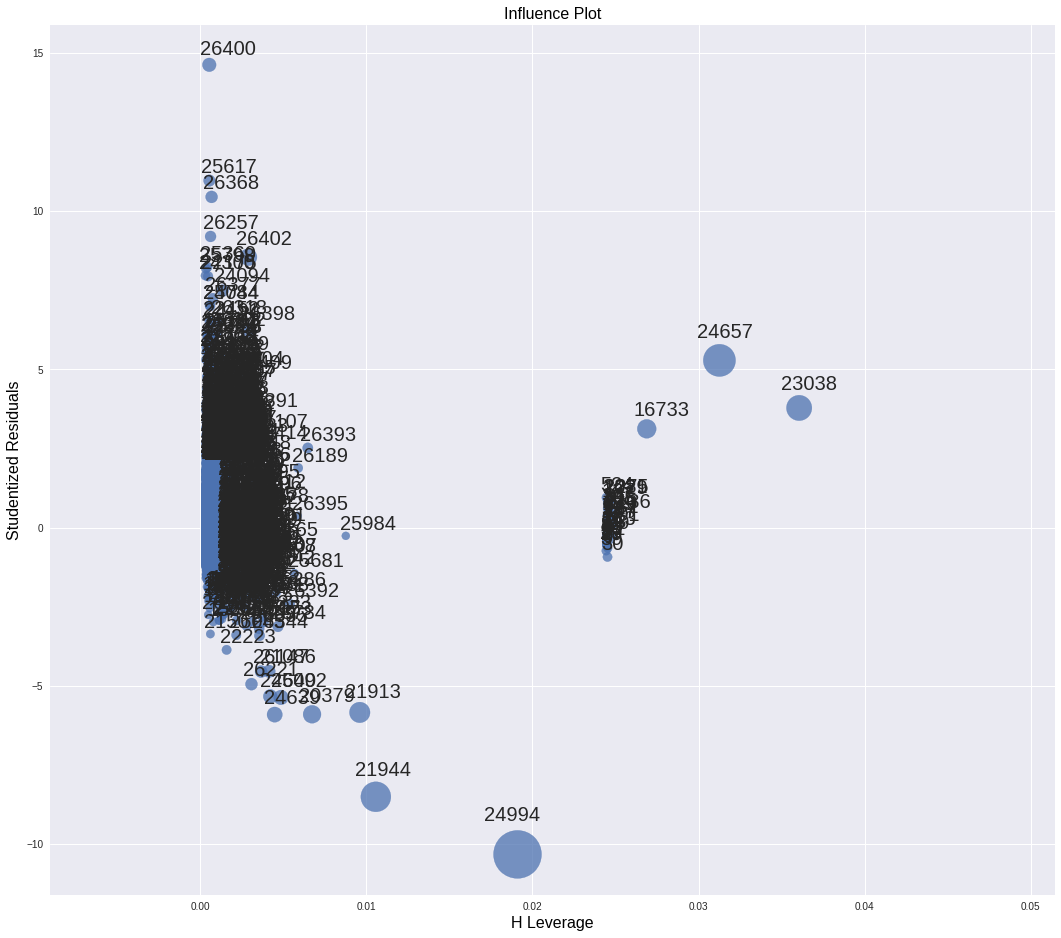

In [ ]:
#influence plot
fig3, ax = plt.subplots(figsize=(18,16))
fig3 = sm.graphics.influence_plot(boston_fit_A, ax=ax)

Text(0, 0.5, 'Absolute Residuals')

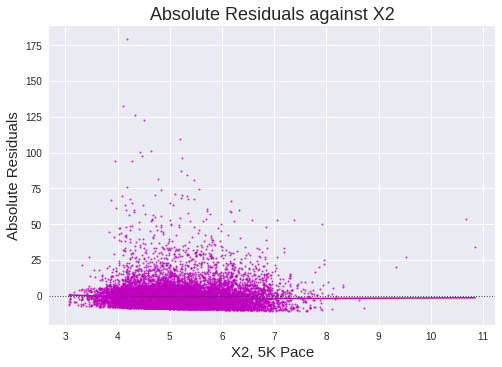

In [ ]:
#residuals against X2

resplotvx4 = sns.residplot(boston_data_A['X2, 5K Pace'], boston_data_A['ABS RES'], lowess=True, color="m")
resplotvx4.axes.set_title('Absolute Residuals against X2')
resplotvx4.axes.set_xlabel('X2, 5K Pace')
resplotvx4.axes.set_ylabel('Absolute Residuals')

Text(0, 0.5, 'Absolute Residuals')

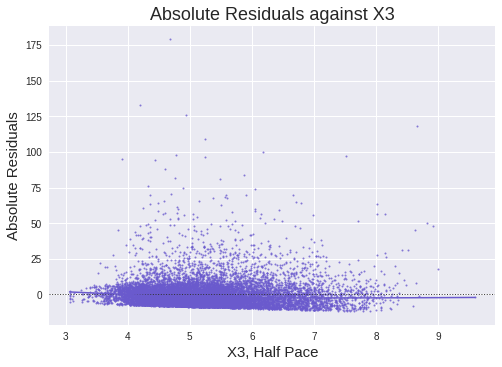

In [ ]:
#residuals against X3

resplotvx4 = sns.residplot(boston_data_A['X3, Half Pace'], boston_data_A['ABS RES'], lowess=True, color="slateblue")
resplotvx4.axes.set_title('Absolute Residuals against X3')
resplotvx4.axes.set_xlabel('X3, Half Pace')
resplotvx4.axes.set_ylabel('Absolute Residuals')